# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [23]:
# Prefer local file if available to avoid network issues
if os.path.exists('cost_revenue_dirty.csv'):
    data = pd.read_csv('cost_revenue_dirty.csv')
else:
    # Fallback to URL if local file is missing
    url = 'https://raw.githubusercontent.com/rudil24/pythonCourse/refs/heads/main/solutions/day078/cost_revenue_dirty.csv'
    data = pd.read_csv(url)

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [24]:
display(data.shape)
display(data.sample(8))
# are there any NaN values present?
print(f'Number of NaN values present:\n{(data.isna().sum())}')
# are there any duplicate rows?
print(f'Duplicate rows: {(data.duplicated().sum())}')
# what are the data types of the columns?
print(f'Data types:\n{(data.dtypes)}')
# easier way to get most of this info
print('\nEasier way to get all this info is via data.info')
display(data.info())

(5391, 6)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4490,3945,11/10/2013,La Vie d'Adèle – Chapitres 1 & 2,"$5,250,000","$22,937,201","$2,450,504"
4719,2632,11/4/2014,The Railway Man,"$18,000,000","$23,910,210","$4,438,438"
4309,4720,1/2/2013,The Gatekeepers,"$1,500,000","$2,592,308","$2,408,553"
430,1424,1/7/1986,Pirates,"$40,000,000","$6,341,825","$1,641,825"
1955,1875,12/31/2002,Confessions of a Dangerous Mind,"$29,000,000","$33,013,805","$16,007,718"
4355,4632,3/19/2013,Straight A's,"$2,000,000",$0,$0
2100,2683,10/10/2003,Good Boy!,"$17,000,000","$45,312,217","$37,667,746"
696,2007,11/24/1993,Mrs. Doubtfire,"$25,000,000","$441,286,003","$219,195,051"


Number of NaN values present:
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
Duplicate rows: 0
Data types:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

Easier way to get all this info is via data.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   ob

None

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [25]:
# complete the above challenge
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   5391 non-null   int64  
 1   Release_Date           5391 non-null   object 
 2   Movie_Title            5391 non-null   object 
 3   USD_Production_Budget  5391 non-null   float64
 4   USD_Worldwide_Gross    5391 non-null   float64
 5   USD_Domestic_Gross     5391 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 252.8+ KB


None

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [26]:
# Convert 'Release_Date' to Pandas Datetime type
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   float64       
 4   USD_Worldwide_Gross    5391 non-null   float64       
 5   USD_Domestic_Gross     5391 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 252.8+ KB


None

### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [27]:
# 1. What is the average production budget of the films in the data set?
print(f"Average Production Budget: ${data['USD_Production_Budget'].mean():,.2f}")

# 2. What is the average worldwide gross revenue of films?
print(f"Average Worldwide Gross Revenue: ${data['USD_Worldwide_Gross'].mean():,.2f}")

# 3. What were the minimums for worldwide and domestic revenue?
print(f"Minimum Worldwide Gross Revenue: ${data['USD_Worldwide_Gross'].min():,.2f}")
print(f"Minimum Domestic Gross Revenue: ${data['USD_Domestic_Gross'].min():,.2f}")

# 4. Are the bottom 25% of films actually profitable or do they lose money?
# This requires comparing production budget to worldwide gross for the bottom 25% by worldwide gross
# First, let's define 'profit' as Worldwide Gross - Production Budget
data['Profit'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']
bottom_25_percent = data.nsmallest(int(len(data) * 0.25), 'USD_Worldwide_Gross')
print(f"Average Profit for Bottom 25% by Worldwide Gross: ${bottom_25_percent['Profit'].mean():,.2f}")
print(f"Number of films in bottom 25% by Worldwide Gross that lost money: {bottom_25_percent[bottom_25_percent['Profit'] < 0].shape[0]}")

# 5. What are the highest production budget and highest worldwide gross revenue of any film?
print(f"Highest Production Budget: ${data['USD_Production_Budget'].max():,.2f}")
print(f"Highest Worldwide Gross Revenue: ${data['USD_Worldwide_Gross'].max():,.2f}")

# 6. How much revenue did the lowest and highest budget films make?
lowest_budget_film = data.nsmallest(1, 'USD_Production_Budget')
highest_budget_film = data.nlargest(1, 'USD_Production_Budget')
print(f"Revenue for Lowest Budget Film (Title: {lowest_budget_film['Movie_Title'].values[0]}, Budget: ${lowest_budget_film['USD_Production_Budget'].values[0]:,.2f}): Worldwide Gross ${lowest_budget_film['USD_Worldwide_Gross'].values[0]:,.2f}")
print(f"Revenue for Highest Budget Film (Title: {highest_budget_film['Movie_Title'].values[0]}, Budget: ${highest_budget_film['USD_Production_Budget'].values[0]:,.2f}): Worldwide Gross ${highest_budget_film['USD_Worldwide_Gross'].values[0]:,.2f}")

Average Production Budget: $31,113,737.58
Average Worldwide Gross Revenue: $88,855,421.96
Minimum Worldwide Gross Revenue: $0.00
Minimum Domestic Gross Revenue: $0.00
Average Profit for Bottom 25% by Worldwide Gross: $-5,442,209.62
Number of films in bottom 25% by Worldwide Gross that lost money: 1174
Highest Production Budget: $425,000,000.00
Highest Worldwide Gross Revenue: $2,783,918,982.00
Revenue for Lowest Budget Film (Title: My Date With Drew, Budget: $1,100.00): Worldwide Gross $181,041.00
Revenue for Highest Budget Film (Title: Avatar, Budget: $425,000,000.00): Worldwide Gross $2,783,918,982.00


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [28]:
# How many films grossed $0 domestically?
domestic_zero_gross = data[data['USD_Domestic_Gross'] == 0]
print(f"Number of films with $0 Domestic Gross: {domestic_zero_gross.shape[0]}")

# What were the highest budget films that grossed nothing domestically?
print("\nHighest budget films with $0 Domestic Gross:")
display(domestic_zero_gross.nlargest(5, 'USD_Production_Budget'))

Number of films with $0 Domestic Gross: 512

Highest budget films with $0 Domestic Gross:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00,"-175,000,000.00"
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00,"-160,000,000.00"
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00,"-103,000,000.00"
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00,"-100,000,000.00"
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00,"-75,452,340.00"


In [29]:
# Filter data_clean for films released before 2017
pre_2017_films = data[data['Release_Date'].dt.year < 2017]

print("Summary Statistics for Pre 2017 films:")
display(pre_2017_films.describe())

Summary Statistics for Pre 2017 films:


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
count,"5,308.00",5308,"5,308.00","5,308.00","5,308.00","5,308.00"
mean,"2,711.28",2003-07-02 12:32:49.555388032,"30,570,288.67","87,511,736.14","40,903,343.68","56,941,447.46"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00,"-110,450,242.00"
25%,"1,366.75",1999-10-22 00:00:00,"5,000,000.00","3,868,327.00","1,346,376.50","-2,199,107.50"
50%,"2,718.50",2006-04-21 00:00:00,"16,500,000.00","27,213,003.50","17,031,701.50","8,000,000.00"
75%,"4,058.25",2011-09-16 00:00:00,"40,000,000.00","95,833,159.25","52,288,810.50","58,871,366.00"
max,"5,391.00",2016-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00"
std,"1,553.18",NaN,"39,769,718.58","165,952,455.71","65,389,296.34","138,892,958.48"


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [30]:
# How many films grossed $0 worldwide?
worldwide_zero_gross = data[data['USD_Worldwide_Gross'] == 0]
print(f"Number of films with $0 Worldwide Gross: {worldwide_zero_gross.shape[0]}")

# What are the highest budget films that had no revenue internationally?
print("\nHighest budget films with $0 Worldwide Gross:")
display(worldwide_zero_gross.nlargest(5, 'USD_Production_Budget'))

# What about films that released pre-2017, answer the same two questions
worldwide_zero_gross_pre_2017 = pre_2017_films[pre_2017_films['USD_Worldwide_Gross'] == 0]
print(f"PRE 2017 Number of films with $0 Worldwide Gross: {worldwide_zero_gross_pre_2017.shape[0]}")
print("\nHighest budget films with $0 Worldwide Gross (PRE 2017):")
display(worldwide_zero_gross_pre_2017.nlargest(5, 'USD_Production_Budget'))


Number of films with $0 Worldwide Gross: 357

Highest budget films with $0 Worldwide Gross:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00,"-175,000,000.00"
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00,"-160,000,000.00"
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00,"-103,000,000.00"
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00,"-100,000,000.00"
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00,"-60,000,000.00"


PRE 2017 Number of films with $0 Worldwide Gross: 346

Highest budget films with $0 Worldwide Gross (PRE 2017):


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00,"-60,000,000.00"
5092,1435,2015-12-31,The Crow,"40,000,000.00",0.00,0.00,"-40,000,000.00"
3300,1631,2008-12-31,Black Water Transit,"35,000,000.00",0.00,0.00,"-35,000,000.00"
5045,1656,2015-10-30,Freaks of Nature,"33,000,000.00",0.00,0.00,"-33,000,000.00"
2358,1690,2004-12-31,George and the Dragon,"32,000,000.00",0.00,0.00,"-32,000,000.00"


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [31]:
international_releases_zero_domestic = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')
print(f"Number of international releases with worldwide gross but zero domestic: {international_releases_zero_domestic.shape[0]}")
print("\nHighest budget international releases with worldwide gross but zero domestic:")
display(international_releases_zero_domestic.nlargest(5, 'USD_Production_Budget'))

Number of international releases with worldwide gross but zero domestic: 155

Highest budget international releases with worldwide gross but zero domestic:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00,"-75,452,340.00"
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,"77,600,000.00","60,680,125.00",0.00,"-16,919,875.00"
4295,1230,2012-12-31,Foodfight!,"45,000,000.00","73,706.00",0.00,"-44,926,294.00"
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,"42,000,000.00","83,833,602.00",0.00,"41,833,602.00"
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,"42,000,000.00","182,156.00",0.00,"-41,817,844.00"


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [32]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [33]:
scrape_date = pd.Timestamp('2018-5-1')

# Identify films not released yet
unreleased_films = data[data['Release_Date'] > scrape_date]
print(f"Number of films not released yet as of {scrape_date.strftime('%B %d, %Y')}: {unreleased_films.shape[0]}")

# Create data_clean without these films
data_clean = data.drop(unreleased_films.index)
print(f"Shape of data_clean (excluding unreleased films): {data_clean.shape}")

Number of films not released yet as of May 01, 2018: 7
Shape of data_clean (excluding unreleased films): (5384, 7)


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [34]:
films_lost_money = data_clean[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]
percentage_lost_money = (len(films_lost_money) / len(data_clean)) * 100
print(f"Number of films where production costs exceeded worldwide gross revenue: {len(films_lost_money)}")
print(f"Percentage of films that lost money: {percentage_lost_money:.2f}%")

Number of films where production costs exceeded worldwide gross revenue: 2007
Percentage of films that lost money: 37.28%


# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



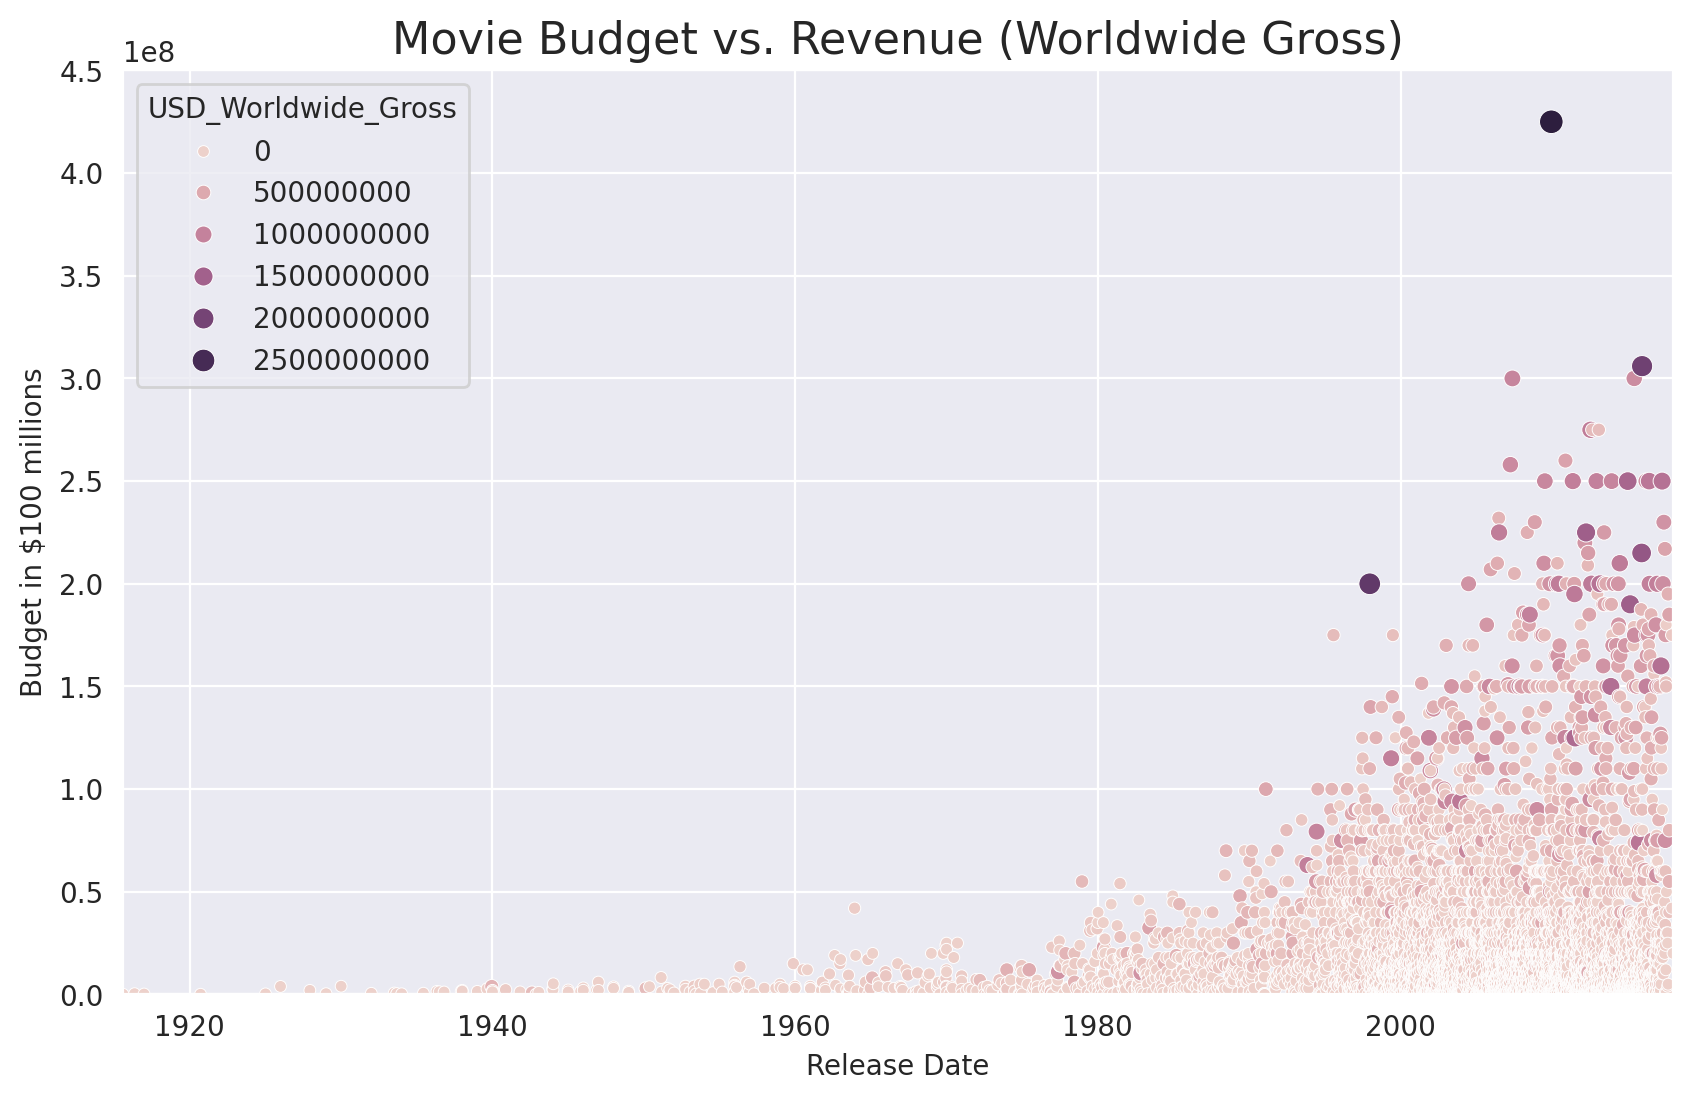

In [35]:
plt.figure(figsize=(10,6), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Release Date',
           ylabel='Budget in $100 millions')

    plt.title('Movie Budget vs. Revenue (Worldwide Gross)', fontsize=16)
    plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [36]:
# Create a DatetimeIndex object from the Release_Date column
datetime_index = pd.DatetimeIndex(data_clean['Release_Date'])

# Grab all the years from the DatetimeIndex object
years = datetime_index.year

# Use floor division // to convert the year data to the decades of the films
decades = (years // 10) * 10

# Add the decades as a Decade column to the data_clean DataFrame
data_clean['Decade'] = decades

display(data_clean.head())

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00","10,890,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,"-385,907.00",1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00","7,800,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00","2,900,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00","21,755,000.00",1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [37]:
# Create old_films DataFrame (films before 1969, up to and including 1969)
old_films = data_clean[data_clean['Decade'] <= 1960]

# Create new_films DataFrame (films from 1970 onwards)
new_films = data_clean[data_clean['Decade'] >= 1970]

# How many films were released prior to 1970?
print(f"Number of films released prior to 1970: {len(old_films)}")

# What was the most expensive film made prior to 1970?
most_expensive_old_film = old_films.nlargest(1, 'USD_Production_Budget')
print("\nMost expensive film made prior to 1970:")
display(most_expensive_old_film)

Number of films released prior to 1970: 153

Most expensive film made prior to 1970:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
109,1253,1963-12-06,Cleopatra,"42,000,000.00","71,000,000.00","57,000,000.00","29,000,000.00",1960


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

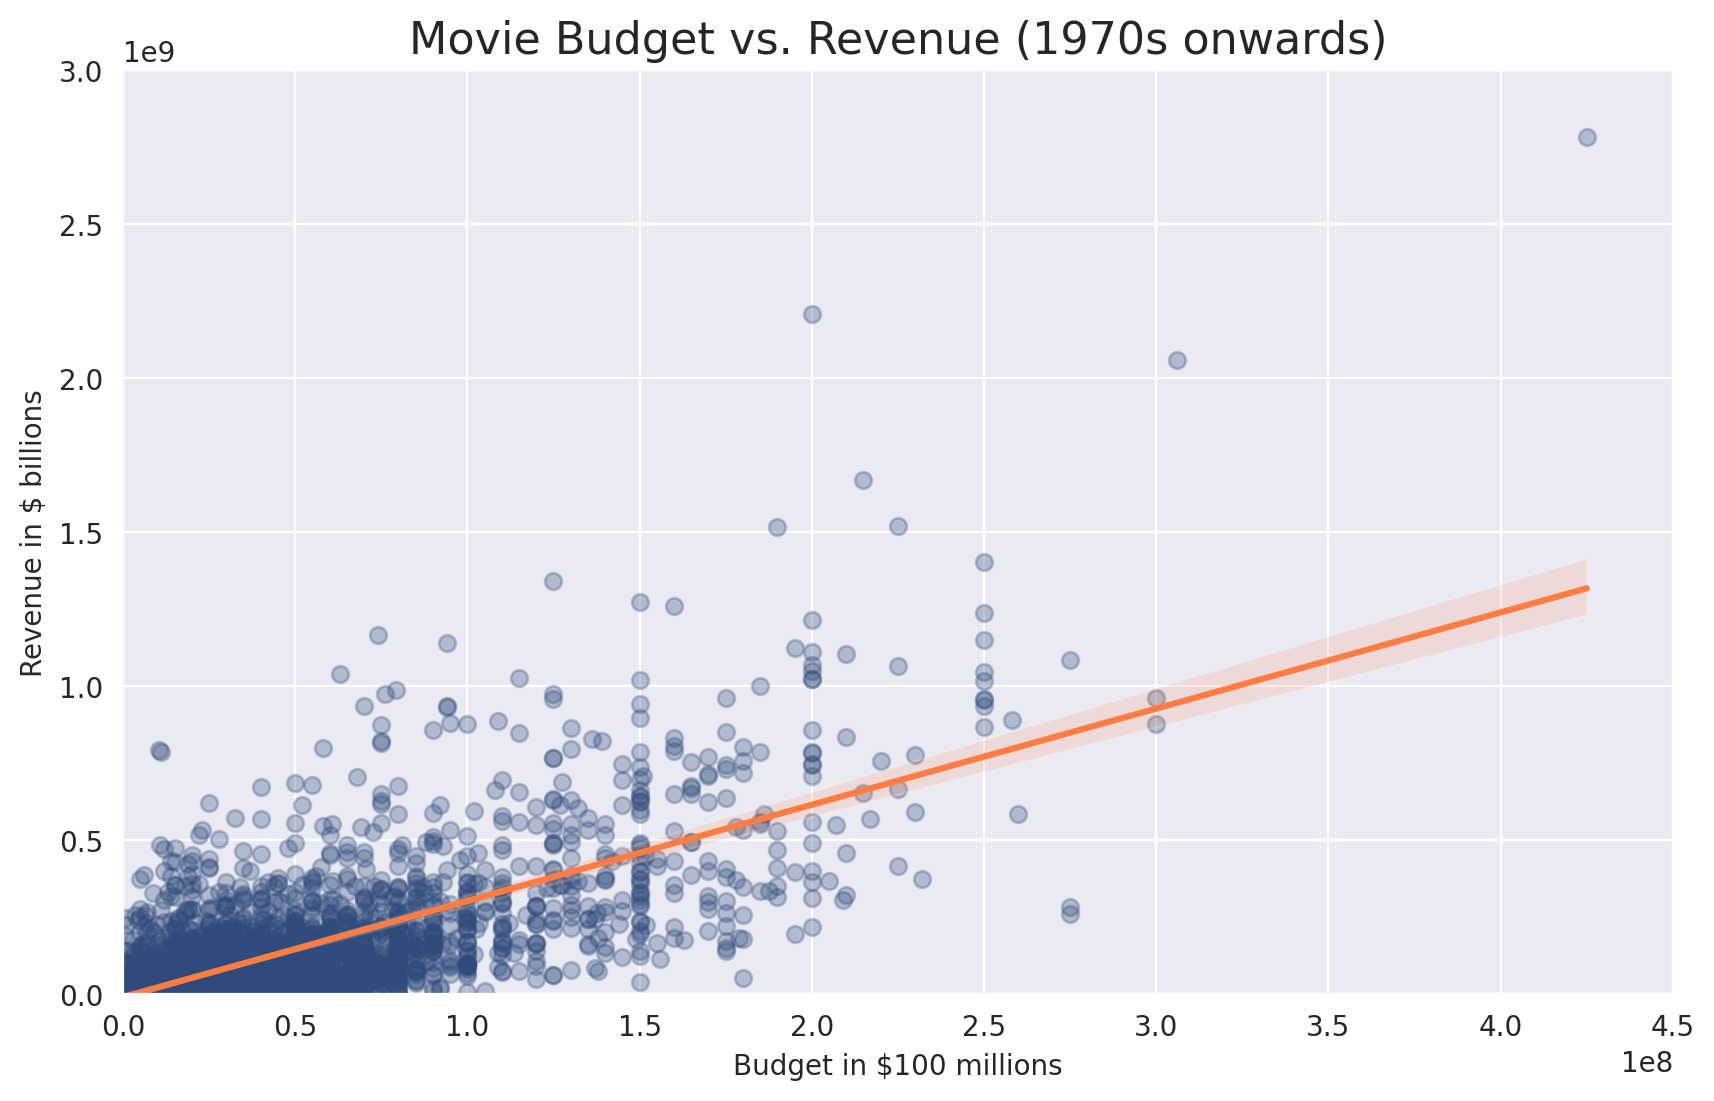

In [38]:
plt.figure(figsize=(10,6), dpi=200)

with sns.axes_style('darkgrid'):
    sns.regplot(data=new_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                color='#2f4b7c',
                scatter_kws = {'alpha': 0.3},
                line_kws = {'color': '#ff7c43'})

    plt.ylim(0, 3000000000) # Set limit for Y-axis up to $3 billion
    plt.xlim(0, 450000000)  # Set limit for X-axis up to $450 million

    plt.xlabel('Budget in $100 millions')
    plt.ylabel('Revenue in $ billions')

    plt.title('Movie Budget vs. Revenue (1970s onwards)', fontsize=16)
    plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [39]:
from sklearn.linear_model import LinearRegression

# Create X and y for old_films
X_old = old_films['USD_Production_Budget'].values.reshape(-1, 1)
y_old = old_films['USD_Worldwide_Gross'].values.reshape(-1, 1)

# Create and fit the model
regression_old = LinearRegression()
regression_old.fit(X_old, y_old)

# Calculate Intercept and Slope
intercept_old = regression_old.intercept_[0]
slope_old = regression_old.coef_[0][0]

# Calculate R-squared
r_squared_old = regression_old.score(X_old, y_old)

print(f"Intercept for old_films: {intercept_old:,.2f}")
print(f"Slope for old_films: {slope_old:,.2f}")
print(f"R-squared for old_films: {r_squared_old:.4f}")
print(f"Variance explained by the linear model for old_films: {r_squared_old * 100:.2f}%")

Intercept for old_films: 22,821,538.64
Slope for old_films: 1.65
R-squared for old_films: 0.0294
Variance explained by the linear model for old_films: 2.94%


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [41]:
# First, we need to train a linear regression model for new_films as well,
# to have a better predictive model than the old_films model.
# Create X and y for new_films
X_new = new_films['USD_Production_Budget'].values.reshape(-1, 1)
y_new = new_films['USD_Worldwide_Gross'].values.reshape(-1, 1)

# Create and fit the model for new_films
regression_new = LinearRegression()
regression_new.fit(X_new, y_new)

# Define the budget for prediction
budget_to_predict = 350000000  # $350 million

# Make the prediction using the new_films model
predicted_revenue = regression_new.predict([[budget_to_predict]])[0][0]

print(f"For a film with a budget of ${budget_to_predict:,.2f},")
print(f"the estimated global revenue is: ${predicted_revenue:,.2f}")

For a film with a budget of $350,000,000.00,
the estimated global revenue is: $1,084,257,803.06


In [40]:
display(old_films.describe())

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
count,153.00,153,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","25,808,336.73","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"-14,250,000.00","1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","2,175,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","7,364,370.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","27,402,877.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","386,625,192.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41","54,245,459.17",12.72


## Key Takeaways from `old_films` Summary Statistics

From the summary statistics of films released before 1970 `old_films`, here are the key insights:

*   **Wide Range in Finances**: There's a significant spread in production budgets, worldwide gross, domestic gross, and profit. This indicates that even in the earlier era of filmmaking, there were both low-budget and high-budget productions, as well as films with varying levels of financial success.
*   **Average Profitability**: On average, old films in this dataset appear to have been profitable. The mean worldwide gross (30.4 million USD) comfortably exceeded the mean production budget (4.6 million USD), resulting in an average profit of around 25.8 million USD.
*   **High-End Productions**: While the averages are relatively low by today's standards, there were standout high-budget films like 'Cleopatra' (42 million USD budget) and high-grossing films (up to 390.5 million USD worldwide). This demonstrates that blockbusters existed even then.
*   **Zero Revenue Films**: The minimum worldwide and domestic gross figures being 0 USD highlight that some films either failed to generate revenue or their revenue was not recorded, consistent with our earlier finding of films with no reported gross.
*   **Limited Predictive Power of Budget**: Crucially, when combined with our previous regression analysis, these statistics reinforce that for `old_films`, the production budget alone was a very weak predictor of worldwide gross revenue (R-squared of only 2.94%). This suggests that factors other than just the financial investment played a much larger role in a film's success during this period.

## Key Comparative Takeaways from Summary Statistics (Old vs. New Films)

Comparing the summary statistics of `old_films` (before 1970) and `new_films` (1970 onwards), we can observe several significant trends:

*   **Scale of Production**: `New_films` show a dramatic increase in scale. The **average production budget** for `new_films` is nearly 7 times higher ($31.8M vs $4.6M for `old_films`), and the **maximum budget** is 10 times higher ($425M vs $42M).

*   **Revenue Potential**: Correspondingly, the worldwide gross for `new_films` is also much higher. The **average worldwide gross** is nearly 3 times greater ($90.7M vs $30.4M for `old_films`), and the **maximum worldwide gross** is almost 7 times larger ($2.78B vs $390.5M).

*   **Profitability**: While both eras show average profitability, `new_films` have a higher **average profit** ($58.9M vs $25.8M for `old_films`). However, the range of outcomes is also much wider, with `new_films` capable of generating significantly larger losses (minimum profit of $-127M vs $-14.25M for `old_films`) as well as massively larger profits.

*   **Variance**: The standard deviations for budget, worldwide gross, and profit are all substantially larger for `new_films`, indicating a much greater spread and variability in financial outcomes in the modern film industry. This aligns with our regression analysis showing a stronger but still imperfect correlation between budget and gross for new films.

In essence, the film industry from 1970 onwards involves much larger financial investments, leading to both greater potential revenues and greater risks of loss, compared to the earlier era.

In [42]:
display(new_films.describe())

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
count,"5,231.00",5231,"5,231.00","5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00",2005-02-19 05:27:18.615943424,"31,811,437.73","90,683,497.56","41,841,922.35","58,872,059.83","2,000.19"
min,1.00,1970-01-01 00:00:00,"1,100.00",0.00,0.00,"-127,426,868.00","1,970.00"
25%,"1,314.50",2000-07-14 00:00:00,"5,000,000.00","3,831,677.00","1,252,581.00","-2,386,213.50","2,000.00"
50%,"2,629.00",2006-10-03 00:00:00,"18,000,000.00","28,544,120.00","17,510,118.00","8,322,573.00","2,000.00"
75%,"3,967.50",2012-01-06 00:00:00,"40,000,000.00","98,777,000.00","53,301,583.00","61,453,613.50","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00","2,010.00"
std,"1,549.33",NaN,"40,758,580.67","170,424,978.36","66,702,734.68","142,586,941.57",9.58


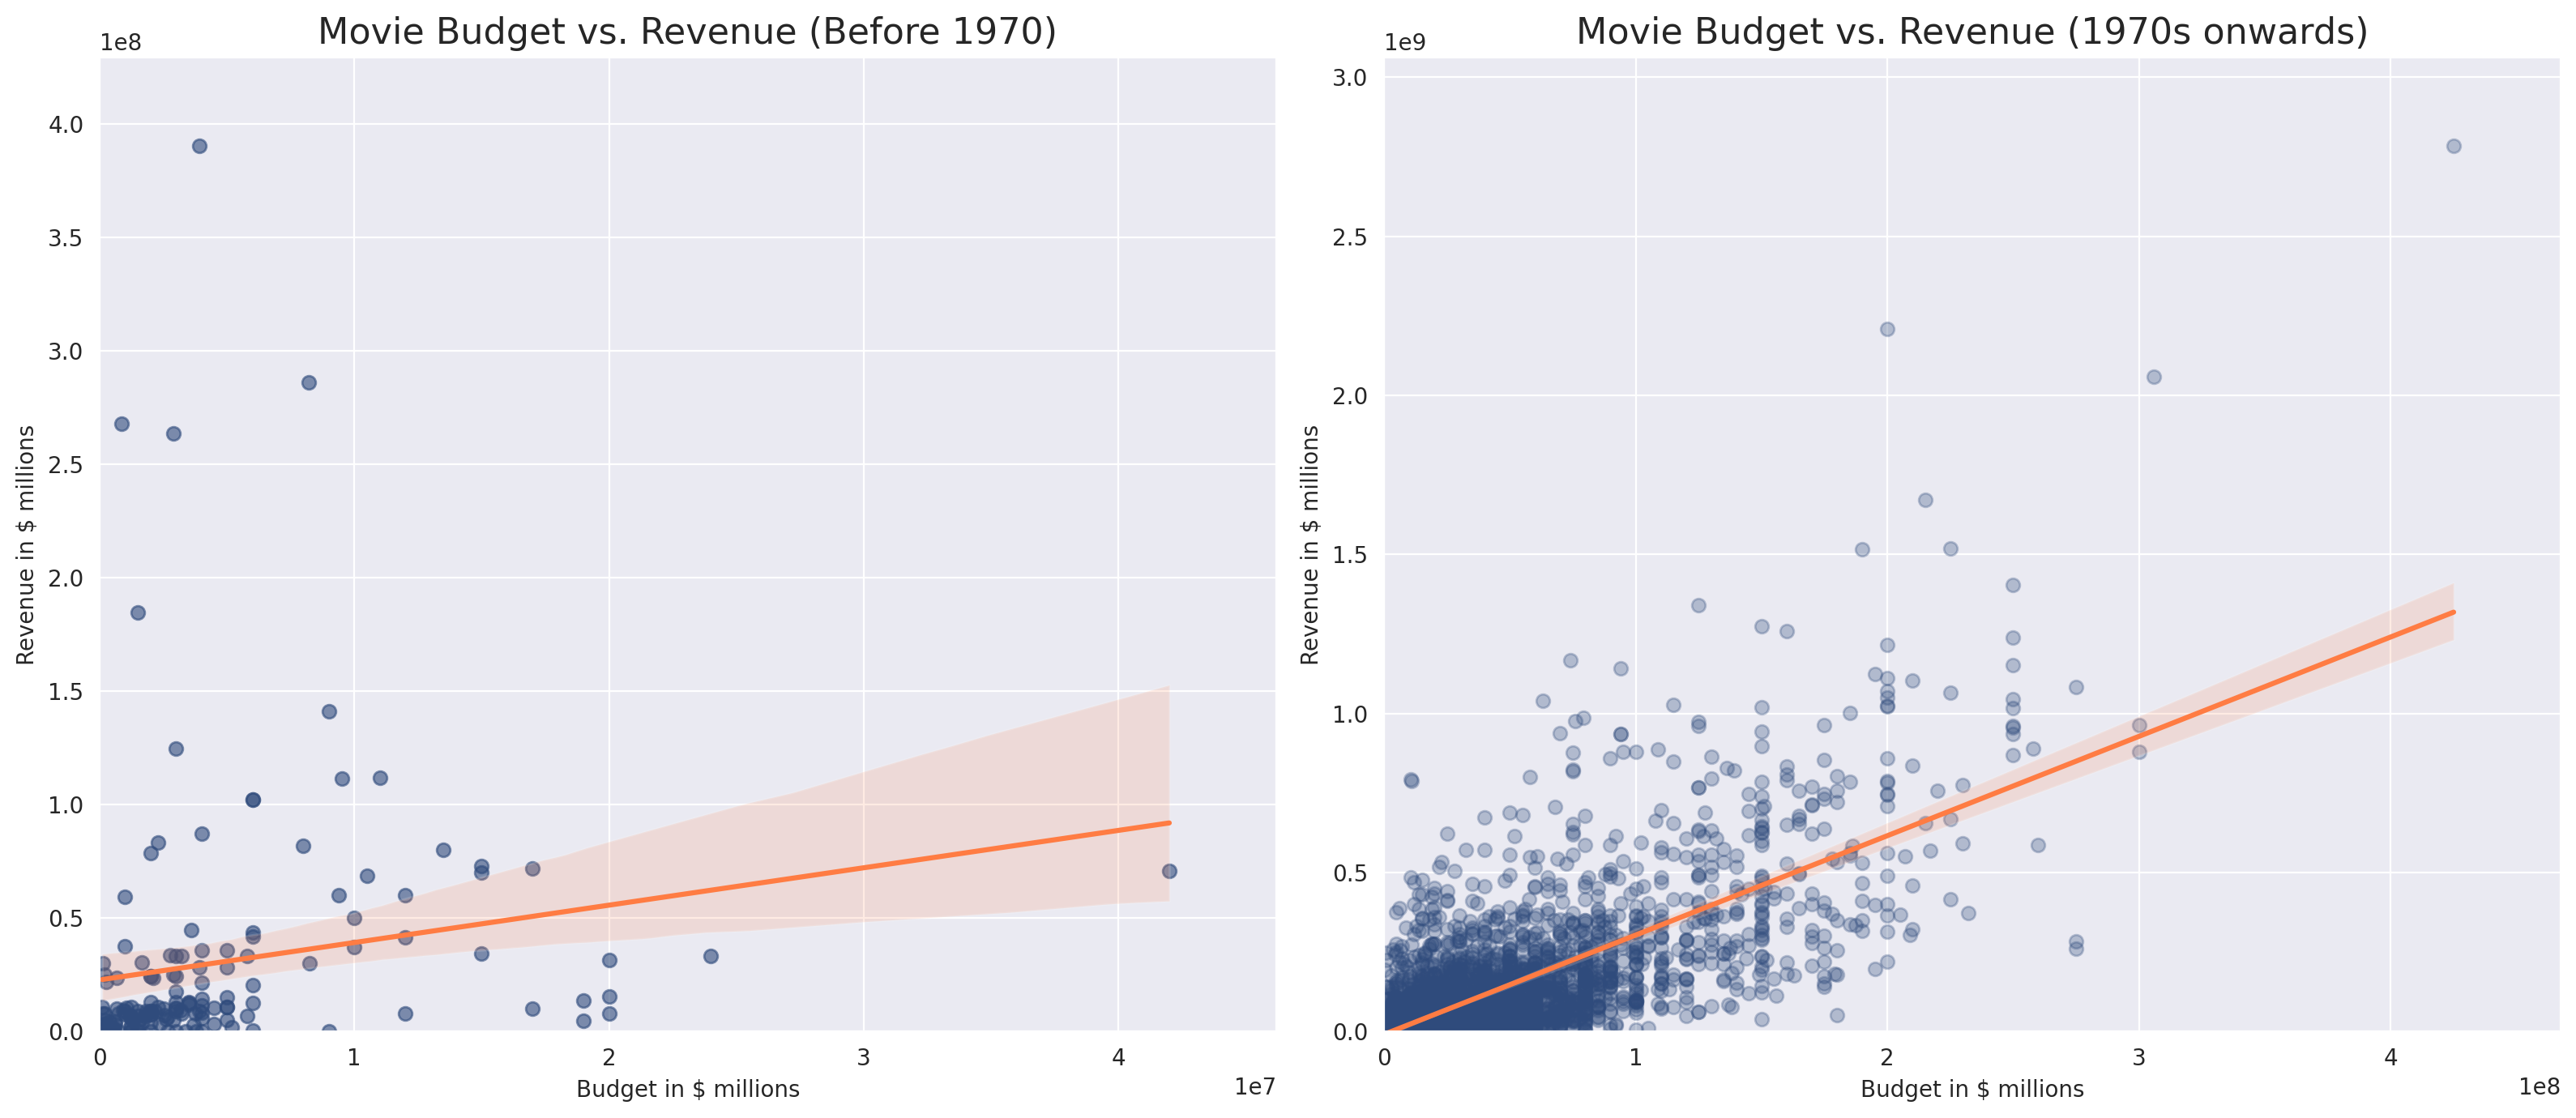

In [43]:
plt.figure(figsize=(16, 7), dpi=200)

with sns.axes_style('darkgrid'):
    # Subplot for OLD FILMS
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.regplot(data=old_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                color='#2f4b7c',
                scatter_kws = {'alpha': 0.6},
                line_kws = {'color': '#ff7c43'})
    plt.ylim(0, old_films['USD_Worldwide_Gross'].max() * 1.1) # Dynamic y-limit
    plt.xlim(0, old_films['USD_Production_Budget'].max() * 1.1)  # Dynamic x-limit
    plt.xlabel('Budget in $ millions')
    plt.ylabel('Revenue in $ millions')
    plt.title('Movie Budget vs. Revenue (Before 1970)', fontsize=16)

    # Subplot for NEW FILMS
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.regplot(data=new_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                color='#2f4b7c',
                scatter_kws = {'alpha': 0.3},
                line_kws = {'color': '#ff7c43'})
    plt.ylim(0, new_films['USD_Worldwide_Gross'].max() * 1.1) # Dynamic y-limit
    plt.xlim(0, new_films['USD_Production_Budget'].max() * 1.1)  # Dynamic x-limit
    plt.xlabel('Budget in $ millions')
    plt.ylabel('Revenue in $ millions')
    plt.title('Movie Budget vs. Revenue (1970s onwards)', fontsize=16)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()